In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import f1_score,classification_report
from sklearn.metrics import log_loss, precision_score, recall_score
from sklearn import datasets, neighbors
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

from sklearn.model_selection import TimeSeriesSplit

from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
data = pd.read_pickle('amazon_food_review_after_preprocess_v2')

In [3]:
data.sort_values('Time',inplace = True)

In [4]:
CleanedTextMe = data['CleanedTextMe']

In [5]:
polarity = data['Score']

In [6]:
tr_raw=data['Text'][:254920]
test_raw = data['Text'][254920:]

In [7]:
import re

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [8]:
import gensim
i=0
list_of_sent_tr=[]
for sent in tr_raw.values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(w.lower())
            else:
                continue 
    list_of_sent_tr.append(filtered_sentence)

C:\Users\JAYESH\Anaconda3\lib\site-packages\gensim\utils.py:862: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [9]:
import gensim
i=0
list_of_sent_test=[]
for sent in test_raw.values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(w.lower())
            else:
                continue 
    list_of_sent_test.append(filtered_sentence)

In [10]:
w2v_model=gensim.models.Word2Vec(list_of_sent_tr,min_count=1,size=50, workers=4)

In [11]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent_tr: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_tr.append(sent_vec)
print(len(sent_vectors_tr))
print(len(sent_vectors_tr[0]))

254920
50


In [12]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent_test: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))

C:\Users\JAYESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


109251
50


In [13]:
x_train = np.asarray(sent_vectors_tr)
x_test = np.asarray(sent_vectors_test)
y_train = polarity.iloc[:254920]
y_test = polarity.iloc[254920:]

In [14]:
np.where(np.isnan(x_train))

(array([], dtype=int64), array([], dtype=int64))

In [26]:
clf = RandomForestClassifier(n_estimators= 500)

In [27]:
clf = clf.fit(x_train, y_train)

In [15]:
np.where(np.isnan(x_test))

(array([101752, 101752, 101752, 101752, 101752, 101752, 101752, 101752,
        101752, 101752, 101752, 101752, 101752, 101752, 101752, 101752,
        101752, 101752, 101752, 101752, 101752, 101752, 101752, 101752,
        101752, 101752, 101752, 101752, 101752, 101752, 101752, 101752,
        101752, 101752, 101752, 101752, 101752, 101752, 101752, 101752,
        101752, 101752, 101752, 101752, 101752, 101752, 101752, 101752,
        101752, 101752], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       dtype=int64))

In [16]:
x_test_cleaned = np.delete(x_test,101752,axis=0)

In [17]:
y_test_cleaned = y_test.drop(y_test.index[[101752]])

In [28]:
prd = clf.predict(x_test_cleaned)

In [29]:
acc = accuracy_score(y_test_cleaned, prd) * 100
print('\nThe accuracy of the NB IS {}' , acc)


The accuracy of the NB IS {} 85.93409610983981


In [25]:
clf1 = GradientBoostingClassifier()

In [26]:
clf1 = clf1.fit(x_train, y_train)

In [27]:
prd = clf1.predict(x_test_cleaned)

In [28]:
acc = accuracy_score(y_test_cleaned, prd) * 100
print('\nThe accuracy of the NB IS {}' , acc)


The accuracy of the NB IS {} 86.64897025171625


In [18]:
import xgboost as xgb

In [59]:
xgb_model = xgb.XGBClassifier(max_depth=8,learning_rate=0.01,n_estimators=150)

In [60]:
xgb_model = xgb_model.fit(x_train, y_train)

In [61]:
prd_xgb = xgb_model.predict(x_test_cleaned)

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [62]:
acc = accuracy_score(y_test_cleaned, prd_xgb) * 100
print('\nThe accuracy of the NB IS {}' , acc)


The accuracy of the NB IS {} 85.64851258581236


## HYPERPARAMTER TUNING

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, train_size=.8)

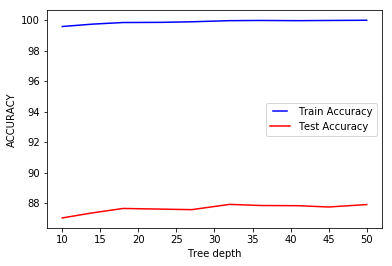

In [61]:
estimators = np.linspace(10, 50, 10, endpoint=True,dtype=int)
train_results = []
test_results = []
for est in estimators:
   dt = RandomForestClassifier(n_estimators= est)
   dt.fit(X_train, Y_train)
   train_pred = dt.predict(X_train)
   acc = accuracy_score(Y_train, train_pred) * 100 
   train_results.append(acc)
   y_pred = dt.predict(X_test)
   acc = accuracy_score(Y_test, y_pred) * 100 
   test_results.append(acc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(estimators, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(estimators, test_results, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('ACCURACY')
plt.xlabel('Tree depth')
plt.show()

In [62]:
print("Maximum Accuracy of ",np.max(test_results),"found with ",estimators[np.argmax(test_results)],"decision trees on Cross Validation set.")

Maximum Accuracy of  87.91973952612584 found with  32 decision trees on Cross Validation set.


In [63]:
test_results

[87.03318688215911,
 87.36662482347403,
 87.6529891730739,
 87.60983838066845,
 87.57453318688216,
 87.91973952612584,
 87.84716773889848,
 87.83343794131491,
 87.7490977561588,
 87.90797112819708]

In [ ]:
random_dist = {
              'n_estimators': [int(x) for x in np.linspace(200,2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(y) for y in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]
              }

clf_avgw2v=RandomForestClassifier()
rscv_avgw2v=RandomizedSearchCV(clf_avgw2v, param_distributions=random_dist,n_jobs=-1)
rscv_avgw2v.fit(x_train, y_train)

## XGBOOST